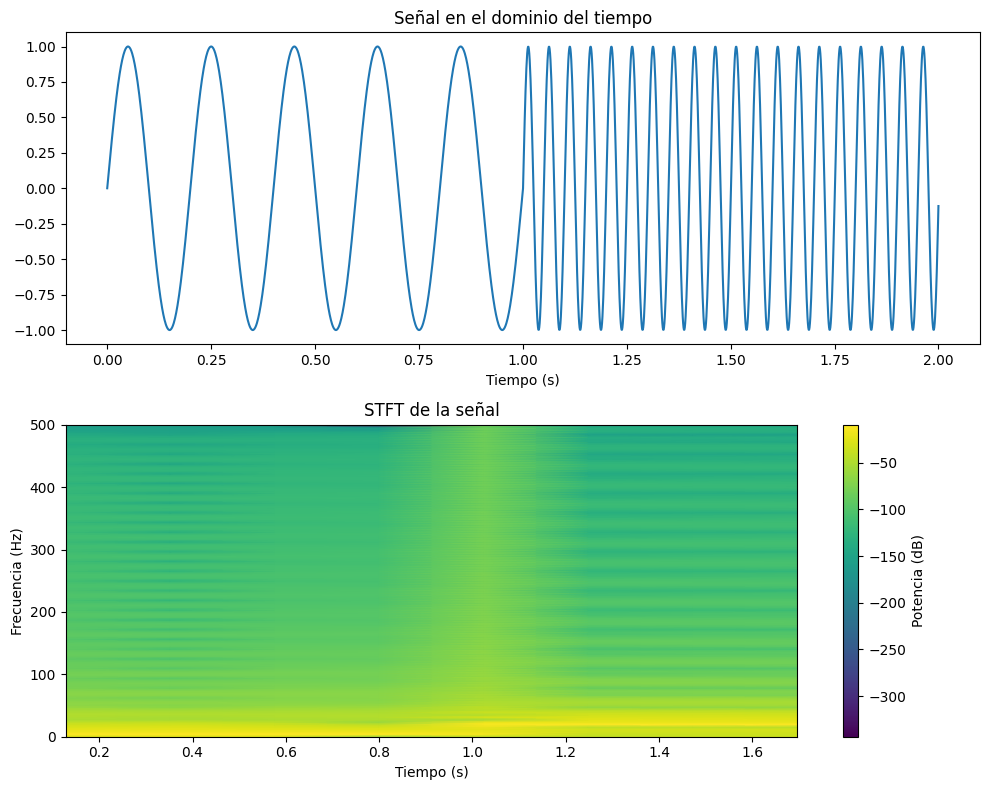

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Generar una señal senoidal con cambio abrupto de frecuencia
t1 = np.linspace(0, 1, 1000, endpoint=False)
t2 = np.linspace(1, 2, 1000, endpoint=False)
x1 = np.sin(2 * np.pi * 5 * t1)  # Frecuencia de 5 Hz
x2 = np.sin(2 * np.pi * 20 * t2)  # Frecuencia de 20 Hz
x = np.concatenate((x1, x2))

# Calcular la STFT con parámetros ajustados
frequencies, times, Sxx = spectrogram(x, fs=1000, nperseg=256)

# Graficar la señal en el dominio del tiempo y su STFT
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, 2, len(x)), x)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')

plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('STFT de la señal')
plt.ylabel('Frecuencia (Hz)')
plt.xlabel('Tiempo (s)')
plt.colorbar(label='Potencia (dB)')

plt.tight_layout()
plt.show()


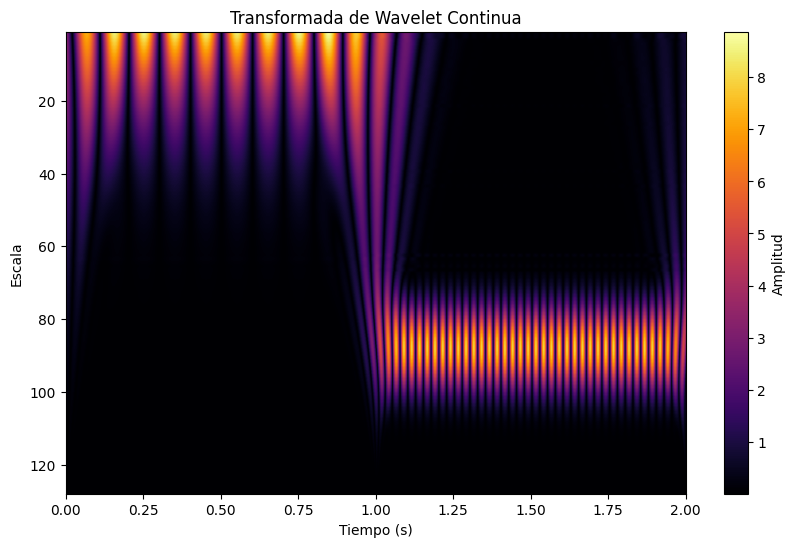

In [6]:
# Definir la escala y la frecuencia central de la wavelet de Morlet
escala = np.arange(1, 128)
frec_central = 10  # Hz
frec_central_rad = frec_central * 2 * np.pi

# Realizar la transformada de wavelet continua
coeficientes, frecuencias = pywt.cwt(x, escala, 'morl', sampling_period=1/1000)

# Graficar los coeficientes de la transformada de wavelet
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeficientes), extent=[0, 2, 1, 128], aspect='auto', cmap='inferno')
plt.colorbar(label='Amplitud')
plt.title('Transformada de Wavelet Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Escala')
plt.gca().invert_yaxis()
plt.show()
